In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [12]:
Data = {
    'page_views' : np.random.randint(100,1000,10),
    'avg_time_spent' : np.random.uniform(1,5,10),
    'bounce_rate' : np.random.uniform(30,70,10)
}
#dataframe 
df = pd.DataFrame(Data)
df.index = [f"Day {i+1}" for i in range(10)]
df

,page_views,avg_time_spent,bounce_rate
Day 1,176,4.077312,38.616132
Day 2,553,1.141410,66.367477
Day 3,198,1.454479,60.747305
Day 4,880,4.989062,38.127605
Day 5,632,2.154051,65.584100
Day 6,313,4.672035,52.566756
Day 7,109,4.275266,46.185516
Day 8,255,2.632472,49.827716
Day 9,410,2.111833,31.123368
Day 10,239,1.538469,41.622363


In [13]:
df.describe()

,page_views,avg_time_spent,bounce_rate
count,10.000000,10.000000,10.000000
mean,376.500000,2.904639,49.076834
std,243.216068,1.455512,12.183628
min,109.000000,1.141410,31.123368
25%,208.250000,1.681810,39.367690
50%,284.000000,2.393261,48.006616
75%,517.250000,4.225777,58.702168
max,880.000000,4.989062,66.367477


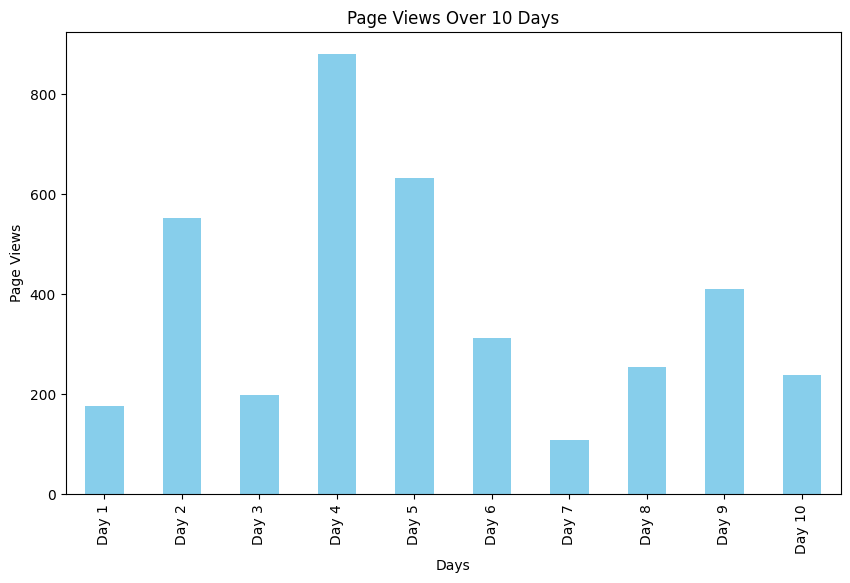

In [14]:
# Bar Graph for Page Views
df['page_views'].plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Page Views Over 10 Days')
plt.xlabel('Days')
plt.ylabel('Page Views')
plt.show()

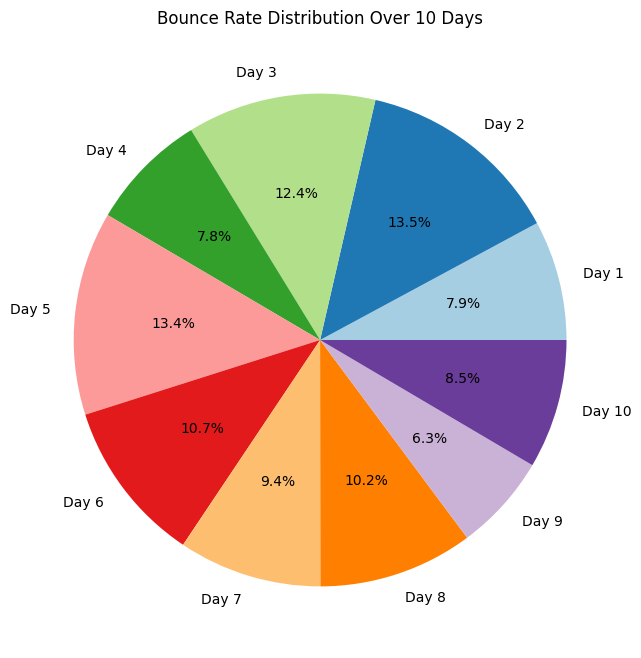

In [15]:
# Pie Chart for Bounce Rate
plt.figure(figsize=(8, 8))
plt.pie(df['bounce_rate'], labels=df.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Bounce Rate Distribution Over 10 Days')
plt.show()

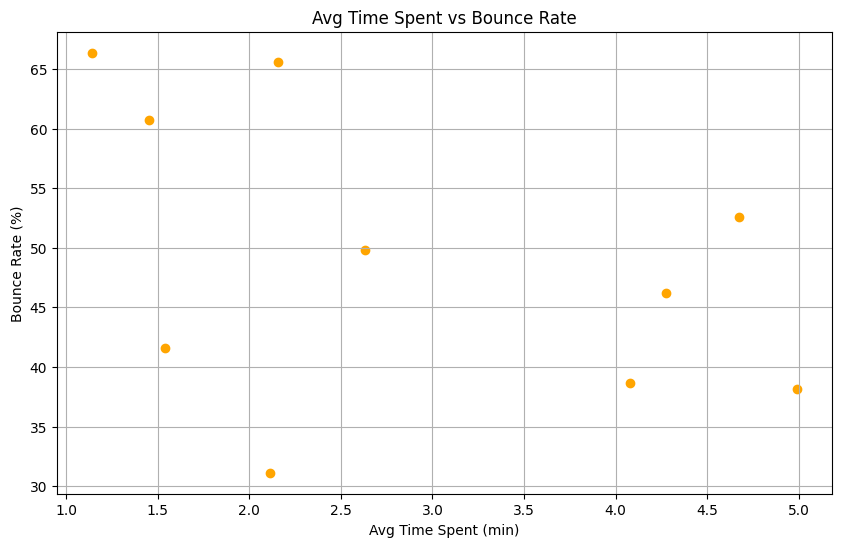

In [16]:
# Scatter plot for Avg Time Spent vs Bounce Rate
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_time_spent'], df['bounce_rate'], color='orange')
plt.title('Avg Time Spent vs Bounce Rate')
plt.xlabel('Avg Time Spent (min)')
plt.ylabel('Bounce Rate (%)')
plt.grid(True)
plt.show()

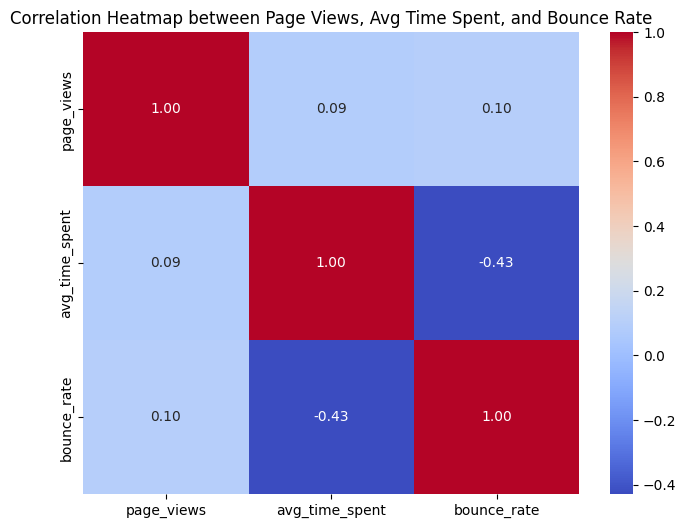

In [17]:
# 1. Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Page Views, Avg Time Spent, and Bounce Rate')
plt.show()




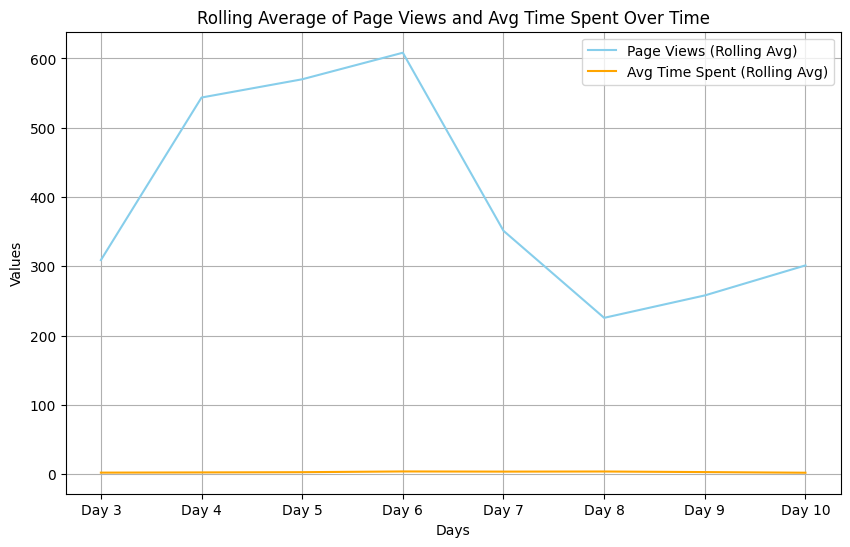

In [19]:
# 2. Rolling Average for Page Views and Avg Time Spent
df['Page Views (Rolling Avg)'] = df['page_views'].rolling(window=3).mean()
df['Avg Time Spent (Rolling Avg)'] = df['avg_time_spent'].rolling(window=3).mean()

# Plotting the rolling averages
plt.figure(figsize=(10, 6))
plt.plot(df['Page Views (Rolling Avg)'], label='Page Views (Rolling Avg)', color='skyblue')
plt.plot(df['Avg Time Spent (Rolling Avg)'], label='Avg Time Spent (Rolling Avg)', color='orange')
plt.title('Rolling Average of Page Views and Avg Time Spent Over Time')
plt.xlabel('Days')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()




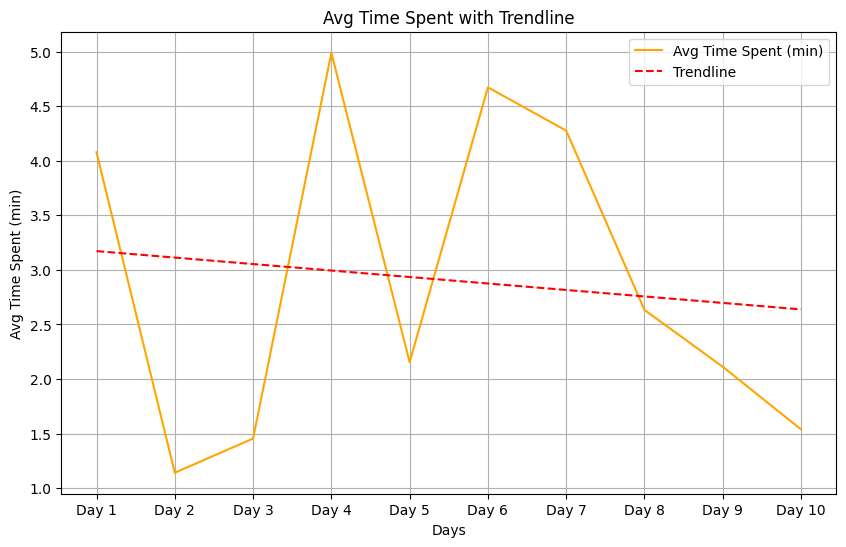

In [21]:
# 3. Trendline for Avg Time Spent

# Reshape data for linear regression (days as X, avg time spent as Y)
X = np.arange(len(df)).reshape(-1, 1)
y = df['avg_time_spent']

# Linear Regression
model = LinearRegression()
model.fit(X, y)
trendline = model.predict(X)

# Plot Avg Time Spent with Trendline
plt.figure(figsize=(10, 6))
plt.plot(df['avg_time_spent'], label='Avg Time Spent (min)', color='orange')
plt.plot(df.index, trendline, label='Trendline', color='red', linestyle='--')
plt.title('Avg Time Spent with Trendline')
plt.xlabel('Days')
plt.ylabel('Avg Time Spent (min)')
plt.legend()
plt.grid(True)
plt.show()



In [23]:
# 4. Actionable Insights Based on Correlations
corr_avg_time_bounce = correlation.loc['avg_time_spent', 'bounce_rate']
corr_avg_time_page_views = correlation.loc['avg_time_spent', 'page_views']

print(f"Correlation between Avg Time Spent and Bounce Rate: {corr_avg_time_bounce:.2f}")
print(f"Correlation between Avg Time Spent and Page Views: {corr_avg_time_page_views:.2f}")

if corr_avg_time_bounce < 0:
    print("Insight: As Avg Time Spent increases, Bounce Rate tends to decrease, suggesting that users who spend more time are less likely to leave the site immediately.")
if corr_avg_time_page_views > 0:
    print("Insight: Higher Avg Time Spent is positively correlated with Page Views, indicating that users who spend more time on the page may return or explore more content.")

Correlation between Avg Time Spent and Bounce Rate: -0.43
Correlation between Avg Time Spent and Page Views: 0.09
Insight: As Avg Time Spent increases, Bounce Rate tends to decrease, suggesting that users who spend more time are less likely to leave the site immediately.
Insight: Higher Avg Time Spent is positively correlated with Page Views, indicating that users who spend more time on the page may return or explore more content.


## Strategies to Increase Average Time Spent

Improve Content Quality: Since high bounce rates are correlated with lower time spent, enhancing the content's quality (e.g., more visuals, detailed analysis, or interactive elements) can encourage users to stay longer.

Internal Linking: Encouraging users to explore other related articles through internal links can reduce bounce rates and increase average time spent on the website.